In [2]:
#import sys
#sys.path.append('C:/Users/LENOVO/AppData/Local/Programs/Python/Python37/Lib/site-packages')

import pandas
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [52]:
data = pandas.read_csv('arr_nr_db\ARR_01.csv')
# store abdomen 1 column info
print(data)
#data = np.array(data)[1:,1:].astype('float32')
print(np.array(data)[1:,1:])

       'Elapsed time'   'ECG' 'Abdomen_1' 'Abdomen_2' 'Abdomen_3' 'Abdomen_4'  \
0      'hh:mm:ss.mmm'    'mV'        'mV'        'mV'        'mV'        'mV'   
1          '0:00.000'  -0.041       0.393      -0.290       0.249      -0.192   
2          '0:00.001'  -0.072       0.578      -0.412       0.358      -0.287   
3          '0:00.002'  -0.076       0.679      -0.479       0.415      -0.343   
4          '0:00.003'  -0.090       0.718      -0.504       0.433      -0.370   
...               ...     ...         ...         ...         ...         ...   
59996      '0:59.995'  -0.306      -0.051      -0.061      -0.060      -0.076   
59997      '0:59.996'  -0.312      -0.049      -0.056      -0.054      -0.067   
59998      '0:59.997'  -0.314      -0.047      -0.051      -0.046      -0.056   
59999      '0:59.998'  -0.314      -0.045      -0.045      -0.038      -0.046   
60000      '0:59.999'  -0.317      -0.042      -0.040      -0.032      -0.037   

      'Abdomen_5'  
0      

In [11]:
data.shape
# ecg, abdomen1, abdomen2, abdomen3, abdomen4, abdomen5

(60000, 6)

Text(0.5, 1.0, '5 Seconds of ECG')

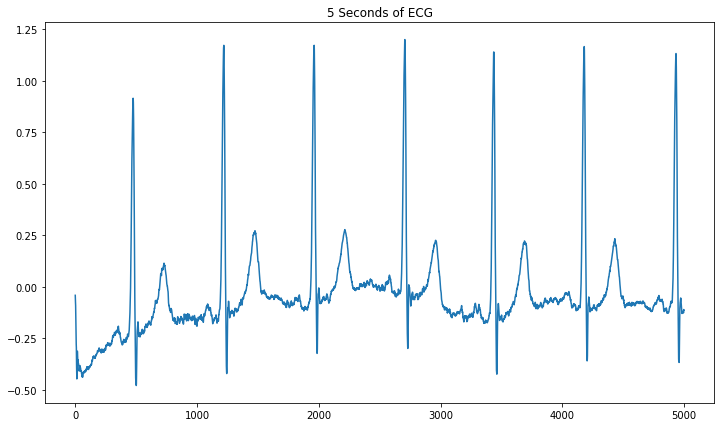

In [15]:
figure(figsize=(12,7))

plt.plot(data[:5000, 0])
plt.title('5 Seconds of ECG')

In [6]:
# deleting file ARR_10 because it had a missing abdomen channel
# hence was causing shape inconsistency

# also, taking 30000 mini seconds because it is again missing in 
# some files
def create_data(split=0.2, n=30000):
    data = []
    for filename in os.listdir('arr_nr_db'):
        df = pandas.read_csv('arr_nr_db/'+filename)
        df_np = np.array(df)[1:n+1, 1:].astype('float32')
        data.append(df_np)
    N = len(data) - int(len(data) * split)
    data = np.array(data)
    y_train = data[:N, :, 0]
    x_train = data[:N, :, 1:]
    y_test = data[N:, :, 0]
    x_test = data[N:, :, 1:]
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
    
x_train, y_train, x_test, y_test = create_data()

In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20, 30000, 5), (20, 30000), (5, 30000, 5), (5, 30000))

# Linear Regression

In [17]:
# To remove baseline wandering noise, discrete wavelet transform is used /// we can do this in the end when we get it

from sklearn.linear_model import LinearRegression, Lasso

# for linear models reshape the x values to (sample, width*height of each sample)
X = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
reg = reg = LinearRegression().fit(X, y_train)

In [18]:
y_ = reg.predict(x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])))

(0.05879898, -1.280128186450746)

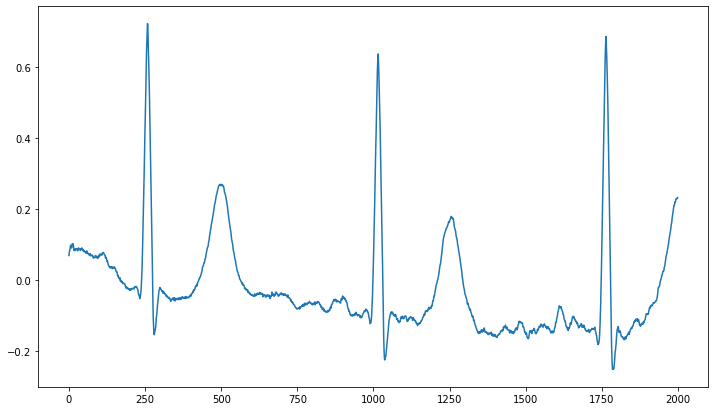

<Figure size 432x288 with 0 Axes>

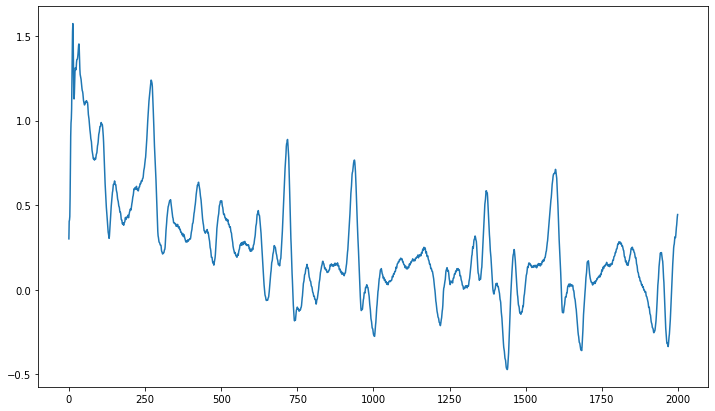

In [19]:
figure(figsize=(12,7))
plt.plot(y_test[0])
plt.figure()

figure(figsize=(12,7))
plt.plot(y_[0])

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_), r2_score(y_test, y_)

# Lasso Regression 

In [85]:
clf = Lasso(alpha=0.1)
clf.fit(X, y_train)

C:\Users\LENOVO\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006486177444458008, tolerance: 0.0064040739089250565
  positive)
C:\Users\LENOVO\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006686210632324219, tolerance: 0.0064227706752717495
  positive)
C:\Users\LENOVO\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006838798522949219, tolerance: 0.006464238744229078
  positive)
C:\Users\LENOVO\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lasso_y = clf.predict(x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2])))

-0.9825730620110237

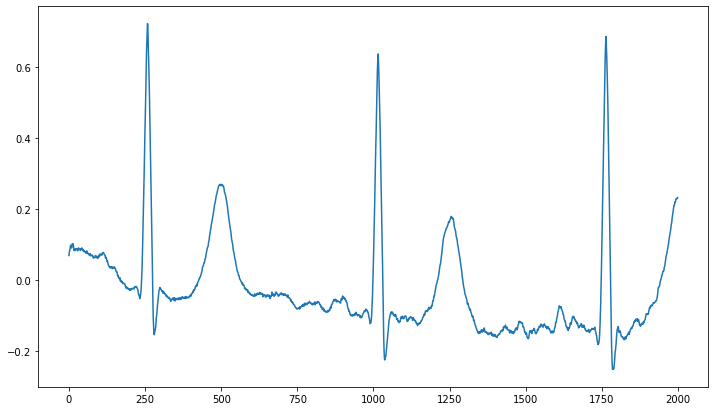

<Figure size 432x288 with 0 Axes>

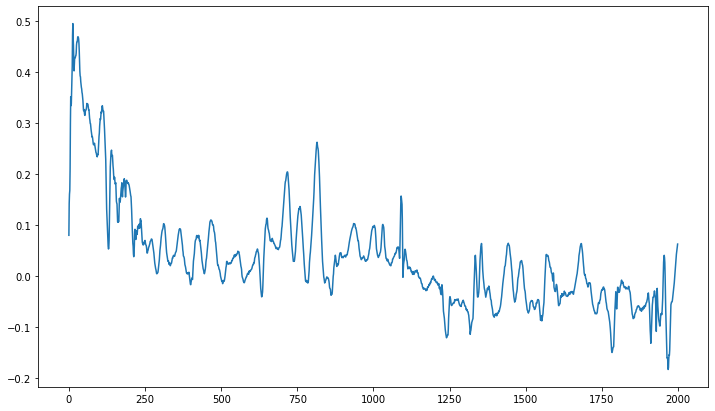

In [87]:
figure(figsize=(12,7))
plt.plot(y_test[0])
plt.figure()

figure(figsize=(12,7))
plt.plot(lasso_y[0])

r2_score(y_test, lasso_y)

# Regression through custom Keras Model

In [ ]:
## available on colab ipynb notebook with enabled 

# different models tried, r^2 value does not go beyond negatives

# ICA to extract ECG 

In [7]:
from sklearn.decomposition import FastICA

transformer = FastICA(random_state=0)

In [8]:
X_transformed = transformer.fit_transform(x_train[0])

In [5]:
X_transformed[:2000, 0].shape, y_train[0].shape, np.sum(X_transformed, axis=1).shape

((2000,), (30000,), (30000,))

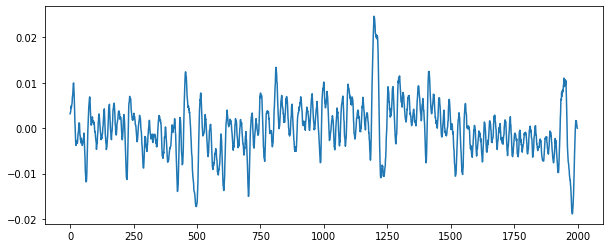

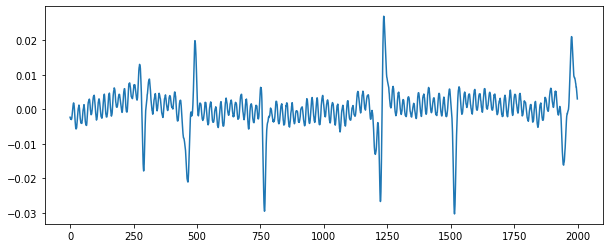

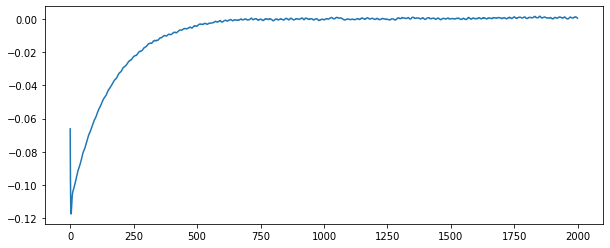

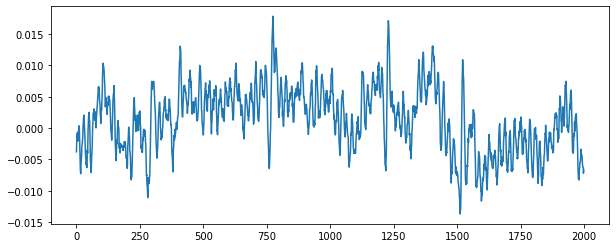

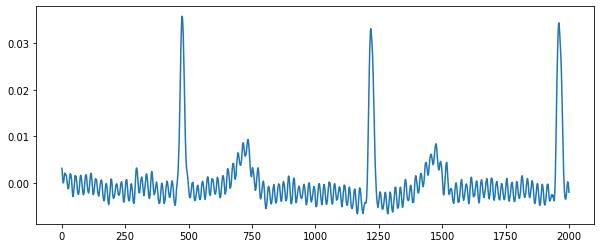

In [13]:
figure(figsize=(10,4))
plt.plot(X_transformed[:2000, 0])
figure(figsize=(10,4))
plt.plot(X_transformed[:2000, 1])
figure(figsize=(10,4))
plt.plot(X_transformed[:2000, 2])
figure(figsize=(10,4))
plt.plot(X_transformed[:2000, 3])
figure(figsize=(10,4))
plt.plot(X_transformed[:2000, 4])

In [6]:
import pywt
cA, cD = pywt.dwt(X_transformed[:3000, 4], 'db6')

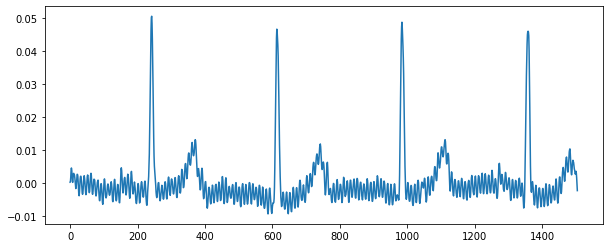

In [7]:
cA.shape, cD.shape
figure(figsize=(10,4))
plt.plot(cA)

(3000, 3)

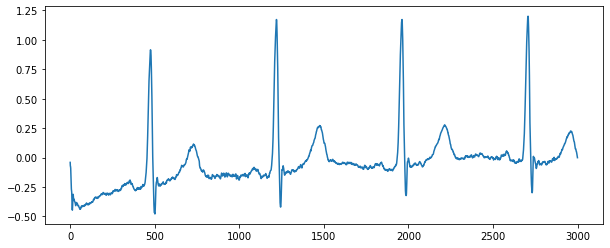

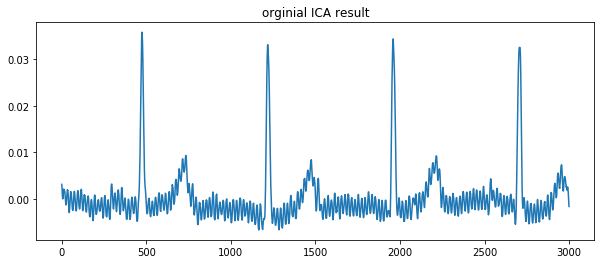

<Figure size 432x288 with 0 Axes>

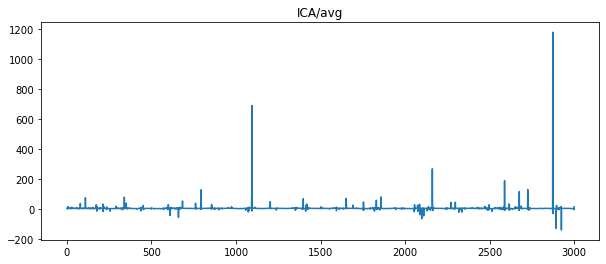

In [8]:
import ewtpy

figure(figsize=(10,4))
plt.plot(y_train[0][:3000])

ewt,  mfb ,boundaries = ewtpy.EWT1D(X_transformed[:3000, 4], N = 3)
figure(figsize=(10,4))
plt.plot(X_transformed[:3000, 4])
plt.title("orginial ICA result")
plt.figure()

ewt.shape # kuch nai hua isse

0.0 1.0 0.0 1.0


<Figure size 432x288 with 0 Axes>

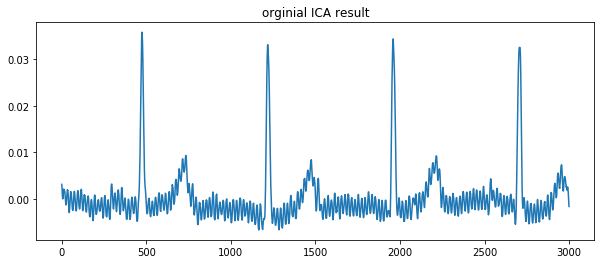

<Figure size 432x288 with 0 Axes>

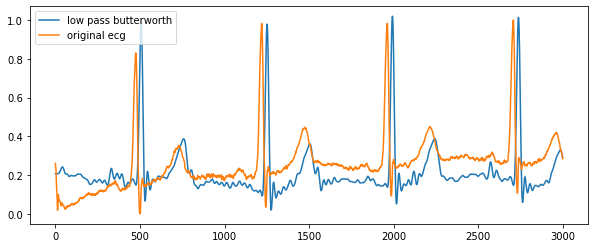

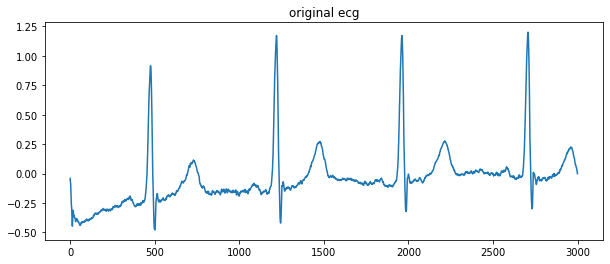

<Figure size 432x288 with 0 Axes>

In [72]:
from scipy import signal

sos = signal.butter(10, 35, fs=1000, output='sos')
filtered = signal.sosfilt(sos, X_transformed[:3000, 4])

figure(figsize=(10,4))
plt.plot(X_transformed[:3000, 4])
plt.title("orginial ICA result")
plt.figure()

figure(figsize=(10,4))
fil = (filtered+(-1*np.min(filtered)))
fil = fil/np.max(fil)
plt.plot(fil+.02)
yt0 = (y_train[0][:3000]+(-1*np.min(y_train[0][:3000])))
yt0 = yt0/np.max(yt0)

print(np.min(fil), np.max(fil), np.min(yt0), np.max(yt0))
plt.plot(yt0)
#plt.title("butterworth filter result")
plt.legend(["low pass butterworth", 'original ecg'])

figure(figsize=(10,4))
plt.plot(y_train[0][:3000])
plt.title("original ecg")
plt.figure()

(3000,) ()


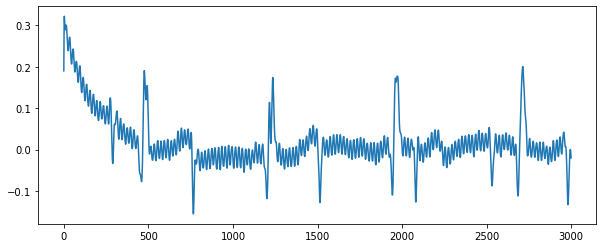

<Figure size 432x288 with 0 Axes>

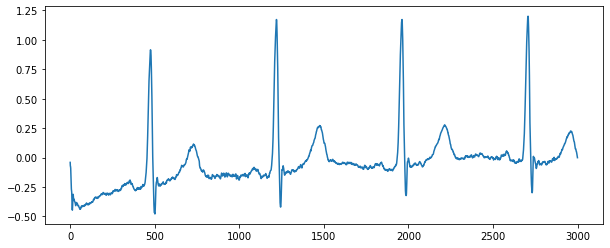

<Figure size 432x288 with 0 Axes>

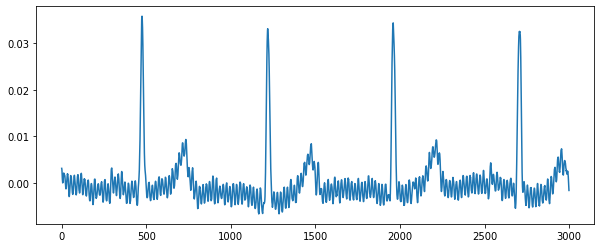

In [128]:
figure(figsize=(10,4))
plt.plot((np.sum(x_train[0], axis=1)[:3000])/5)
plt.figure()

figure(figsize=(10,4))
plt.plot(y_train[0][:3000])
plt.figure()

figure(figsize=(10,4))
plt.plot(X_transformed[:3000, 4])


In [ ]:
# proceed to see which one matches the crests and troughs the most then noise remove

# EMG Signals

In [3]:
# plot emg

emg1_ = pandas.read_csv("EMG1.csv")
emg1 = np.array(emg1_)

In [84]:
emg1_

,'Elapsed time','1','1_DOCFILT-4-0.08-4','1_DOCFILT-4-0.3-3','1_DOCFILT-4-0.3-4','2','2_DOCFILT-4-0.08-4','2_DOCFILT-4-0.3-3','2_DOCFILT-4-0.3-4','3','3_DOCFILT-4-0.08-4','3_DOCFILT-4-0.3-3','3_DOCFILT-4-0.3-4'
0,'hh:mm:ss.mmm','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV'
1,'0:00.000',0.083,0.002,0.001,0.002,0.013,0.001,0.000,0.001,-0.057,-0.001,-0.000,-0.001
2,'0:00.050',0.087,0.014,0.005,0.013,0.014,0.004,0.003,0.007,-0.060,-0.003,-0.001,-0.003
3,'0:00.100',0.082,0.035,0.016,0.031,0.016,0.011,0.010,0.018,-0.058,-0.008,-0.003,-0.007
4,'0:00.150',0.074,0.051,0.029,0.046,0.015,0.016,0.018,0.028,-0.054,-0.012,-0.006,-0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,'0:09.750',-0.059,-0.025,-0.018,-0.017,-0.010,-0.040,-0.020,-0.020,-0.144,-0.018,-0.006,-0.006
197,'0:09.800',-0.056,-0.027,-0.022,-0.020,-0.010,-0.040,-0.020,-0.020,-0.150,-0.019,-0.006,-0.007
198,'0:09.850',-0.064,-0.034,-0.028,-0.027,-0.010,-0.042,-0.022,-0.021,-0.150,-0.018,-0.006,-0.006
199,'0:09.900',-0.075,-0.042,-0.034,-0.035,-0.015,-0.045,-0.025,-0.024,-0.146,-0.018,-0.007,-0.005


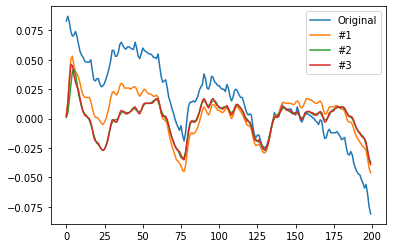

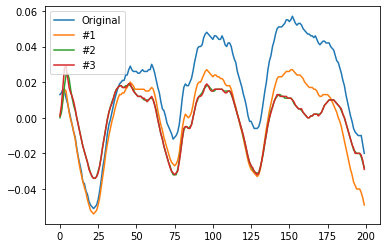

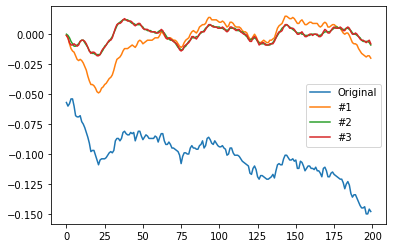

In [5]:
#1
plt.plot(emg1[1:, 1].astype('float32'))
plt.plot(emg1[1:, 2].astype('float32'))
plt.plot(emg1[1:, 3].astype('float32'))
plt.plot(emg1[1:, 4].astype('float32'))
plt.legend(['Original', '#1', '#2', '#3'])
plt.figure()
#2
plt.plot(emg1[1:, 5].astype('float32'))
plt.plot(emg1[1:, 6].astype('float32'))
plt.plot(emg1[1:, 7].astype('float32'))
plt.plot(emg1[1:, 8].astype('float32'))
plt.legend(['Original', '#1', '#2', '#3'])
#3 
plt.figure()
plt.plot(emg1[1:, 9].astype('float32'))
plt.plot(emg1[1:, 10].astype('float32'))
plt.plot(emg1[1:, 11].astype('float32'))
plt.plot(emg1[1:, 12].astype('float32'))
plt.legend(['Original', '#1', '#2', '#3'])